In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [17]:
def initialize_membership_matrix(n_points, n_clusters):
    np.random.seed(42)
    return np.random.dirichlet(np.ones(n_clusters), size=n_points)

In [18]:
def compute_cluster_centers(data, membership_matrix, m):
    membership_power = membership_matrix ** m
    return (membership_power.T @ data) / membership_power.sum(axis=0)[:, None]

In [19]:
def update_membership_matrix(data, centroids, m):
    distances = cdist(data, centroids) + 1e-10  # Tránh chia cho 0
    inv_dists = distances ** (-2 / (m - 1))
    return inv_dists / np.sum(inv_dists, axis=1, keepdims=True)

In [20]:
def evaluate_clusters(data, labels):
    db_index = davies_bouldin_score(data, labels)
    ch_index = silhouette_score(data, labels)
    return db_index, ch_index

In [21]:
def fuzzy_c_means(data, n_clusters, m=2.0, epsilon=1e-5, max_iter=10000):
    n_points, _ = data.shape
    membership_matrix = initialize_membership_matrix(n_points, n_clusters)
    start_time = time.time()

    for iteration in range(max_iter):
        cluster_centers = compute_cluster_centers(data, membership_matrix, m)
        new_membership_matrix = update_membership_matrix(data, cluster_centers, m)
        
        if np.linalg.norm(new_membership_matrix - membership_matrix) < epsilon:
            break
        
        membership_matrix = new_membership_matrix

    process_time = time.time() - start_time
    labels = np.argmax(membership_matrix, axis=1)
    db_index, ch_index = evaluate_clusters(data, labels)
    
    return cluster_centers, membership_matrix, iteration + 1, process_time, db_index, ch_index

In [22]:
def plot_clusters(data, centroids, membership_matrix, title):
    labels = np.argmax(membership_matrix, axis=1)
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'Fuzzy C-Means Clustering - {title}')
    plt.legend()
    plt.show()

Dữ liệu: D:/Truong_NCKH/Data/Iris.csv
Thời gian chạy: 0.0708 giây
Số bước lặp: 20
DB-Index: 0.8956, CH-Index: 0.4523



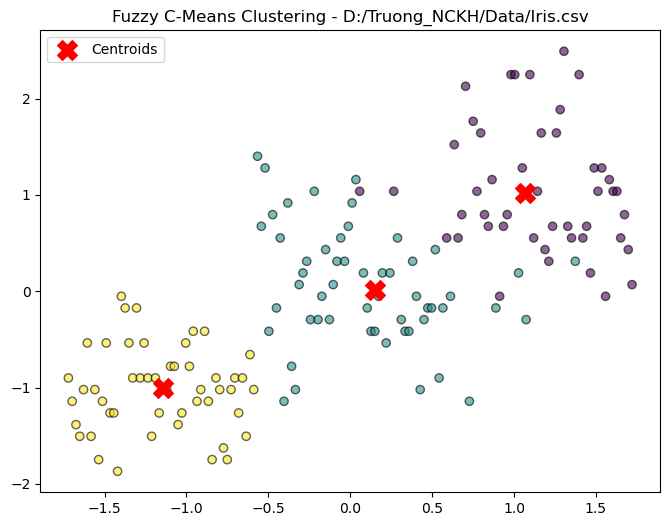

Dữ liệu: D:/Truong_NCKH/Data/Wine.csv
Thời gian chạy: 0.0030 giây
Số bước lặp: 24
DB-Index: 1.3254, CH-Index: 0.3060



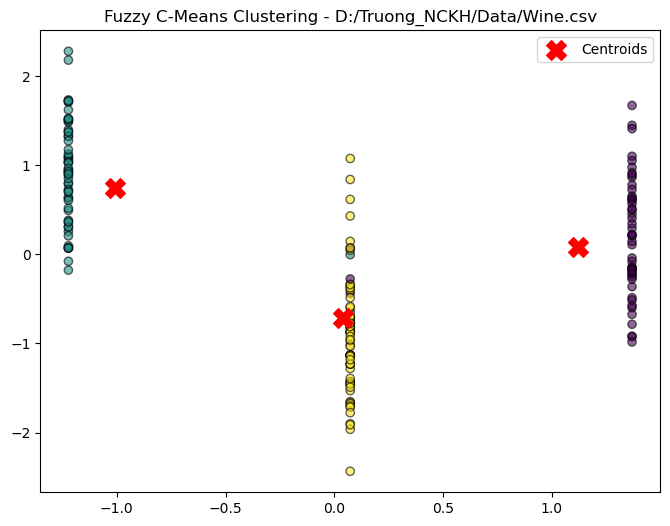

In [28]:

# Đọc và xử lý dữ liệu từ các tệp
def load_and_process_data(file_path, n_clusters):
    df = pd.read_csv(file_path)
    data = df.select_dtypes(include=[np.number]).values  # Chỉ lấy các cột số
    scaler = StandardScaler()
    data = scaler.fit_transform(data)  # Chuẩn hóa dữ liệu
    
    centroids, membership_matrix, steps, process_time, db_index, ch_index = fuzzy_c_means(data, n_clusters)
    
    print(f"Dữ liệu: {file_path}")
    print(f"Thời gian chạy: {process_time:.4f} giây")
    print(f"Số bước lặp: {steps}")
    print(f"DB-Index: {db_index:.4f}, CH-Index: {ch_index:.4f}\n")
    
    if data.shape[1] >= 2:  # Chỉ vẽ nếu có ít nhất 2 cột
        plot_clusters(data, centroids, membership_matrix, title=file_path)

# Danh sách tệp dữ liệu
files = {
    "D:/Truong_NCKH/Data/Iris.csv": 3,
    "D:/Truong_NCKH/Data/Wine.csv": 3
}


# Chạy thuật toán trên từng tệp
for file, clusters in files.items():
    load_and_process_data(file, clusters)
